# 6. Word Clouds

In this lab, we will create <b>word clouds</b>-artistic representations of words from a speech, book, song or poem.  The freuency or number of times a word occurs is represented by the size of that word in the word cloud.

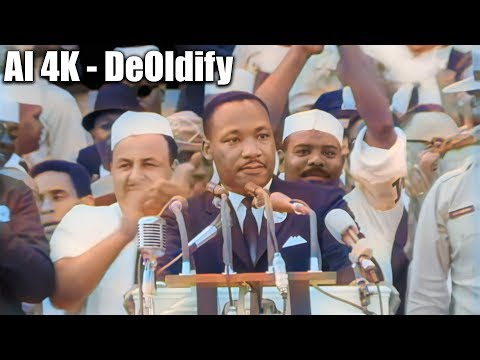

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('o8dzxh7Ybqw', width=800, height=300)

<h3>STEP ONE</h3>
Import the Python data analytics (pandas or pd) and numerical Python (numpy) libraries.

In [2]:
import pandas as pd
import numpy as np

Q1. What is the abbreviation for numpy?
<hr>
<h3>STEP TWO</h3>
Use pandas (pd) to read in the Excel file with the words of the chorus "I have the joy, joy, joy, joy, down in my heart."  

In [3]:
joy=pd.read_excel("joy.xlsx")  #read in the Excel file with the words
joy.head(5)  #Display the first 5 rows.

,WORDS
0,I
1,have
2,the
3,joy
4,joy


Q2. What word is in row 4?
<hr>
<h3>STEP THREE</h3>
Get the frequencies of each word

In [4]:
joy["WORDS"].value_counts()

joy      8
heart    5
in       5
down     5
my       3
where    3
have     2
my       2
I        2
the      2
stay     1
to       1
Name: WORDS, dtype: int64

Q3. Which word has the highest frequency?
<hr>
<h3> STEP FOUR</h3>
We can make a simple word cloud by putting each important word in a specified place, with a given color, and given size.
Add the text joy to the word cloud at position .3,.5 in color 'red' and fontsize=80.

In [5]:
from matplotlib import pyplot as plt # library used for making graphs 
fig=plt.figure()
plt.gca().text(.3,.5, 'joy',color='red',fontsize=80)
plt.gca().text(.1,.7, 'heart',color='green',fontsize=50)
plt.gca().text(.6,.3, 'down',color='gray',fontsize=50)
plt.gca().text(.7,.6, 'my',color='yellow',fontsize=50)
plt.gca().text(.1,.2, 'where',color='pink',fontsize=30)
plt.gca().text(.4,.2, 'I',color='brown',fontsize=20)
plt.gca().text(.15,.05, 'have',color='purple',fontsize=20)
plt.gca().text(.4,.1, 'stay',color='cyan',fontsize=10)
plt.show()

Q4. What command is used to include the word joy?
<hr>
<h3> STEP FIVE</h3>
Data scientists have created functions to make word clouds so we don't have to enter each word or letter one by one.  These are found in the wordcloud library. 

In [6]:
!pip install wordcloud
import wordcloud #used to make a wordcloud

Q5. What is the name of the library which creates word clouds?
<hr>
<h3>STEP SIX</h3>
Check how fast the computer can read the text file with the lyrics to All I Need is You.

In [7]:
import time   #use to measure time
start = time.time()  #record the start time
with open('I have a dream.txt','r') as file:  #read in the text file
    speech = file.readlines()
finish = time.time()  #record the finish time
print(finish - start)

0.001997709274291992


Q6. How fast did the computer read the text file?
<hr>
<h3> STEP SEVEN</h3>
Define a function to take out punctuation marks and count the interesting words

In [8]:
#Define a function which counts the interesting words
def calculate_frequencies(textfile):
    #list of punctuations
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    #list of uninteresting words 
    uninteresting_words = ["AND","IT","THE"]  #add to this list
   
     # removes punctuation and uninteresting words
    import re
    fc1=str(textfile)
    fc2= fc1.split(' ')
    for i in range(len(fc2)): 
        fc2[i] = fc2[i].upper()
    #Remove punctuations
    fc3 = []
    for s in fc2:
        if not any([o in s for o in punctuations]):
            fc3.append(s)
    #Remove uninteresting words
    fc4=[]
    for s in fc3:
        if not any([o in s for o in uninteresting_words]):
            fc4.append(s)
    fc5=[]
    for s in fc4:
        if not any([o.lower() in s for o in uninteresting_words]):
            fc5.append(s)
            
    while('' in fc5) : 
        fc5.remove('') 
        
    import collections
    fc6 = collections.Counter(fc5)

    #wordcloud
    cloud = wordcloud.WordCloud( max_words = 30)  #can adjust the number of words
    cloud.generate_from_frequencies(fc6)
    return cloud.to_array()

Q7. What uninteresting words does the above function remove from the word cloud?
<hr>

<h3> STEP EIGHT</h3>
Make the word cloud by executing the next cell.  Then modify the calculate_frequencies() function to elimnate uninteresting words.  Also change how many words are displayed.

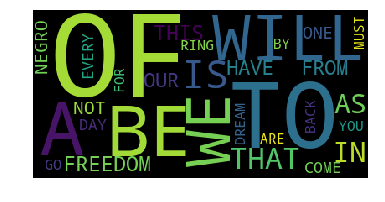

In [9]:
myimage = calculate_frequencies(speech)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.savefig('Ihaveadream.png', bbox_inches='tight')
plt.show()

Q8. What is the name of the file with the word cloud image for the I have a dream speech?
<hr>


<h3> ACTIVITY</h3>
Create word cloud of a famous speech, poem, song etc. Then edit out all the uninteresting words. Then see if the others in the class can figure out your source from 10 words, 20 words, 30 words etc.


#### Solutions

Q1) np  

Q2) joy

Q3)  joy

Q4) plt.gca().text(.3,.5, 'joy',color='red',fontsize=80)

Q5) wordcloud

Q6) Will vary with computer, but much less than 1 second.

Q7) "AND","IT","THE"

Q8) 'Ihaveadream.png'

#### Activity

Here is an example using the song "All I Need is You" by Lecrae.

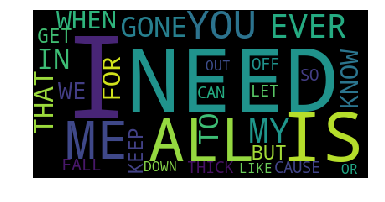

In [10]:
with open('allineedisyou.txt','r') as file:  #read in the text file
    rap_lyrics = file.readlines()
    
myimage = calculate_frequencies(rap_lyrics)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.savefig('allineedisyou.png', bbox_inches='tight')
plt.show()